In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = "EGIE3.SA"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
log_ret = np.log(1 + data.pct_change())
log_ret.tail()

,EGIE3.SA
Date,
2020-05-11,-0.013430
2020-05-12,-0.016574
2020-05-13,-0.010295
2020-05-14,0.043433
2020-05-15,0.001303


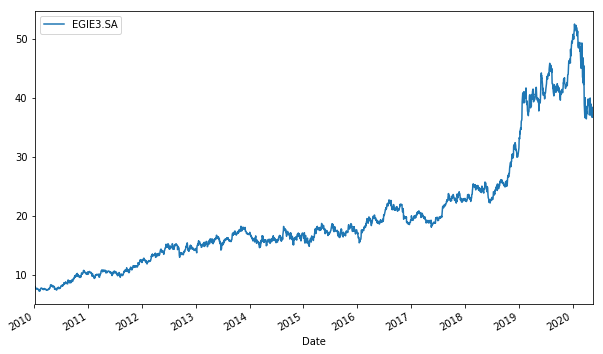

In [4]:
data.plot(figsize=(10,6))

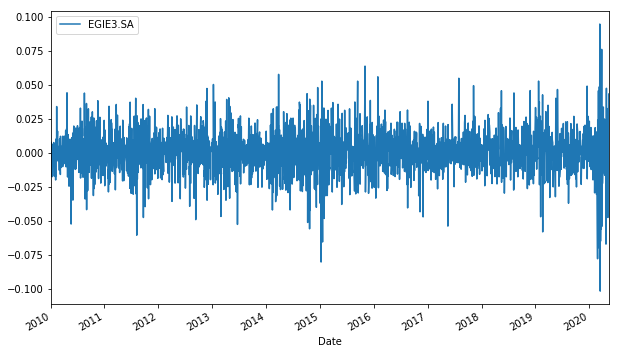

In [5]:
log_ret.plot(figsize=(10,6))

In [6]:
u = log_ret.mean()
u

EGIE3.SA    0.000609
dtype: float64

In [7]:
var = log_ret.var()
var

EGIE3.SA    0.000248
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

EGIE3.SA    0.000485
dtype: float64

In [9]:
stdev = log_ret.std()
stdev

EGIE3.SA    0.015746
dtype: float64

In [10]:
np.array(drift)

array([0.00048513])

In [11]:
drift.values

array([0.00048513])

In [12]:
stdev.values

array([0.01574553])

In [13]:
norm.ppf(0.95)

1.6448536269514722

In [14]:
x = np.random.rand(10,2)
x

array([[0.53942129, 0.18619097],
       [0.18838309, 0.18154541],
       [0.48808473, 0.86733958],
       [0.61217411, 0.56780886],
       [0.79788239, 0.22930865],
       [0.99115626, 0.98587319],
       [0.42988005, 0.24242246],
       [0.54150179, 0.76725219],
       [0.14775429, 0.34711413],
       [0.49274424, 0.81064771]])

In [15]:
norm.ppf(x)

array([[ 0.09897588, -0.8920205 ],
       [-0.8838704 , -0.90949135],
       [-0.0298716 ,  1.11390291],
       [ 0.28499003,  0.1707984 ],
       [ 0.83408122, -0.74112557],
       [ 2.37209617,  2.19374686],
       [-0.17667957, -0.69853142],
       [ 0.10421792,  0.72982751],
       [-1.0461136 , -0.39312351],
       [-0.01818849,  0.88028564]])

In [16]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.87625847,  0.98850409],
       [ 0.17811779,  0.37343009],
       [-0.18785911,  1.07388686],
       [-2.68030629, -1.670833  ],
       [-0.26707157,  0.27061056],
       [ 2.05888703, -0.75418318],
       [ 0.78531729, -1.05892402],
       [-0.23385731,  0.33036487],
       [-0.28103949, -1.50521404],
       [-0.31597301, -2.77766915]])

In [17]:
t_intervals = 5
iterations = 200

In [18]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [19]:
daily_returns

array([[1.01939549, 1.01592662, 0.99361691, 0.9778406 , 0.9724125 ,
        1.01143313, 0.98649568, 0.97952788, 1.02137286, 1.00516222,
        1.0174308 , 0.99525847, 0.99530086, 1.00600989, 0.99960612,
        0.99799833, 1.0178289 , 1.01257132, 1.0039023 , 1.00800802,
        0.99317171, 0.9932627 , 1.00090135, 1.00224184, 1.01343183,
        0.99234182, 0.99515302, 0.99469641, 1.01587586, 1.00098889,
        0.97681042, 0.99603873, 1.01192252, 1.00286431, 1.00850311,
        1.00389896, 1.01987251, 1.010274  , 0.99389509, 1.03281508,
        1.0229086 , 1.01512832, 1.00988099, 0.99440519, 0.97137617,
        0.98647721, 1.0101037 , 1.00043656, 1.02230621, 0.99339538,
        0.99125946, 0.996848  , 0.98094528, 1.01506913, 0.99145471,
        1.01716417, 1.02432963, 1.00003304, 0.9869332 , 0.97903614,
        1.03141334, 1.00753529, 0.98382539, 0.97645699, 1.0173191 ,
        0.99893609, 1.00531605, 1.00479682, 0.98084248, 0.98581361,
        0.96801269, 0.98945717, 1.00921972, 1.01

In [20]:
S0 = data.iloc[-1]
S0

EGIE3.SA    38.400002
Name: 2020-05-15 00:00:00, dtype: float64

In [21]:
price_list = np.zeros_like(daily_returns)

In [22]:
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [23]:
price_list[0] = S0
price_list

array([[38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.40000153, 38.40000153,
        38.40000153, 38.40000153, 38.40000153, 38.4

In [24]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

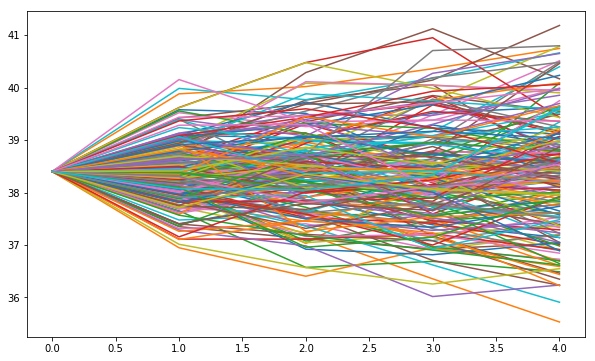

In [25]:
plt.figure(figsize=(10,6))
plt.plot(price_list)